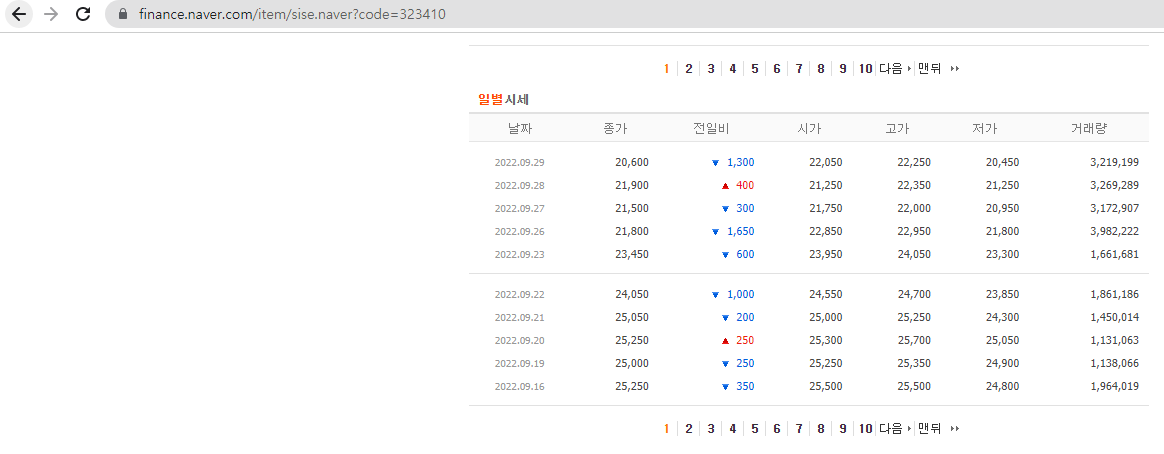

In [ ]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
import FinanceDataReader as fdr
import time

In [ ]:
def get_day_list(item_code, page_no):
    """
    일자별 시세를 페이지별로 수집
    1) url을 만든다
    2) request를 통해 html 문서를 받아온다
    3) read_html을 통해 table 태그를 읽어온다
    4) 결측행을 제거
    5) 데이터프레임 반환
    """
    url = f"https://finance.naver.com/item/sise_day.naver?code={item_code}&page={page_no}"

    response = requests.get(url, headers = {"user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36"})

    table = pd.read_html(response.text)[0].dropna().reset_index(drop=True) #인덱스도 다시 해주었음

    return table

In [ ]:
def get_item_list(item_name):
    """
    일별 시세를 수집하는 함수
    """
    df_krx = fdr.StockListing("KRX")
    item_code = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].values[0]

    # web page 시작번호
    page_no = 1
    # 데이터를 저장할 빈 변수 선언
    item_list = []
    curr_day = ""

    while True:
        # 일단 시세 수집
        df_item = get_day_list(item_code, page_no)
        
        # 해당 데이터의 마지막 날짜
        last_day = df_item.iloc[-1]["날짜"]

        # 해당 데이터의 마지막 날짜와 이전 데이터의 마지막 날짜를 비교합니다
        # 맨 첫 데이터에는 이전 데이터 날짜가 없어서 반복문 밖에서 초기화
        # 만약 이전 데이터의 마지막 날짜와 현재 데이터의 마지막 날짜가 같다면 반복문 out
        if last_day == curr_day:
            break

        # 현재 데이터의 날짜를 다음 턴에서 비교할 수 있게 변수에 값을 넣어준다
        curr_day = last_day

        # 수집한 일별 시세를 리스트에 넣어줌
        item_list.append(df_item)

        # 다음페이지를 수집하기 위해 페이지의 번호를 1 증가시킴
        page_no = page_no + 1

        time.sleep(0.1)
    
    df_day = pd.concat(item_list)

    df_day["종목코드"] = item_code
    df_day["종목명"] = item_name

    cols = ['종목코드', '종목명', '날짜', '종가', '전일비', '시가', '고가', '저가', '거래량']
    df_day = df_day[cols].drop_duplicates().reset_index(drop=True) # 인덱스도 다시 지정해줌

    return df_day

In [ ]:
get_item_list("카카오뱅크")

,종목코드,종목명,날짜,종가,전일비,시가,고가,저가,거래량
0,323410,카카오뱅크,2022.09.29,20600.0,1300.0,22050.0,22250.0,20450.0,3219199.0
1,323410,카카오뱅크,2022.09.28,21900.0,400.0,21250.0,22350.0,21250.0,3269289.0
2,323410,카카오뱅크,2022.09.27,21500.0,300.0,21750.0,22000.0,20950.0,3172907.0
3,323410,카카오뱅크,2022.09.26,21800.0,1650.0,22850.0,22950.0,21800.0,3982222.0
4,323410,카카오뱅크,2022.09.23,23450.0,600.0,23950.0,24050.0,23300.0,1661681.0
...,...,...,...,...,...,...,...,...,...
277,323410,카카오뱅크,2021.08.12,73800.0,600.0,73600.0,75400.0,72700.0,5878196.0
278,323410,카카오뱅크,2021.08.11,74400.0,3000.0,71200.0,77500.0,68100.0,21592734.0
279,323410,카카오뱅크,2021.08.10,71400.0,7100.0,81800.0,85600.0,68000.0,26495122.0
280,323410,카카오뱅크,2021.08.09,78500.0,8700.0,69800.0,89100.0,69000.0,44833696.0
